#**Step 1: Upload Data to Colab**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.

## 1.1 Import Libraries and Upload Data

In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## 1.2 Upload the files

In [8]:
print("Please upload your dataset files (.csv):")
uploaded = files.upload()

# Get the list of uploaded filenames
filenames = list(uploaded.keys())
print(f"\nUploaded files: {filenames}")

Please upload your dataset files (.csv):


Saving train_set.csv to train_set.csv

Uploaded files: ['train_set.csv']


#Step 2: Data Preprocessing

## 2.1 Importing the libraries

In [9]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

## 2.2 Loading and Merging the data

In [10]:
dfs = []
print("--- Loading and Merging Data ---")

for file in filenames:
    try:
        # Read CSV file (assuming utf-8 encoding, try 'latin-1' if this fails)
        df = pd.read_csv(file)
        dfs.append(df)
        print(f"Loaded file {file}: {df.shape}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print(f"\nTotal shape after merging: {combined_df.shape}")
else:
    print("No data loaded.")

--- Loading and Merging Data ---
Loaded file train_set.csv: (16267, 4)

Total shape after merging: (16267, 4)


## 2.3 Data cleaning

In [11]:
# Remove duplicates
combined_df.drop_duplicates(inplace=True)
# Handle missing values (dropping rows as discussed)
combined_df.dropna(inplace=True)

print(f"Shape after cleaning: {combined_df.shape}")


Shape after cleaning: (16267, 4)


## 2.4 Data Transformation

In [12]:
# Add text length column for analysis
# Note: Change 'text' to the actual name of the column containing the email content in your file
if 'text' not in combined_df.columns:
    print("WARNING: Column 'text' not found. Please update the column name in the code.")
else:
    combined_df['length'] = combined_df['text'].apply(len)

# Label Encoding - Assuming the label column is 'text_type' or 'label'
# You must change 'text_type' to your actual label column name (e.g., 'label', 'class')
target_col = 'text_type'  # <--- UPDATE THIS COLUMN NAME IF NEEDED
if target_col in combined_df.columns:
    le = LabelEncoder()
    combined_df['target'] = le.fit_transform(combined_df[target_col])
    print(f"Label Encoded: {dict(zip(le.classes_, le.transform(le.classes_)))}")
else:
    print(f"Label column '{target_col}' not found.")

Label Encoded: {'ham': np.int64(0), 'spam': np.int64(1)}


## 2.5 Data Spliting

In [13]:
# Separate features (X) and target (y)
X = combined_df.drop(['target', target_col], axis=1, errors='ignore')
y = combined_df['target']

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nData Splitting Complete:\nTrain: {X_train.shape}\nTest: {X_test.shape}")


Data Splitting Complete:
Train: (13013, 3)
Test: (3254, 3)


#Step 3: Model Training and Evaluation

## 3.1 Importing libraries

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 3.2 Vectorize Text (Convert text to numbers)

In [15]:
print("--- Vectorizing Text Data ---")
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Only use the 'text' column for training
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
X_test_tfidf = vectorizer.transform(X_test['text'])

--- Vectorizing Text Data ---


## 3.3 Define Models

In [16]:
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

## 3.4 Train and Evaluate


--- Evaluation Results ---

Model: Naive Bayes
Accuracy:  0.9112
Precision: 0.8693
Recall:    0.8273
F1-Score:  0.8478


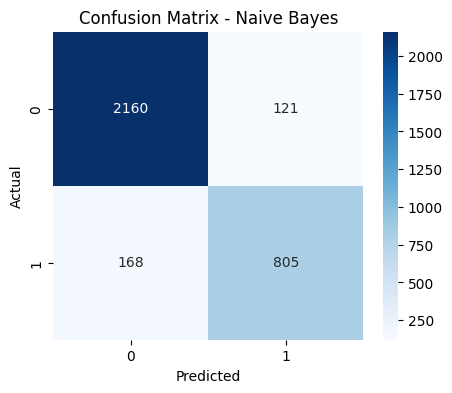


Model: SVM
Accuracy:  0.9348
Precision: 0.9223
Recall:    0.8541
F1-Score:  0.8869


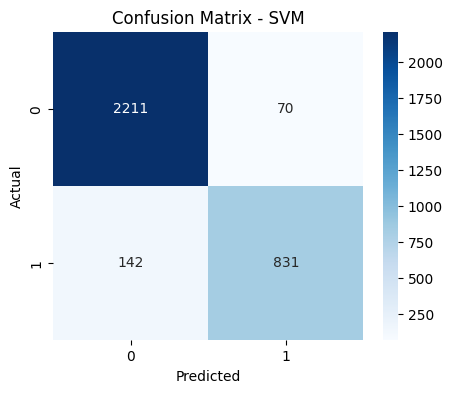


Model: Random Forest
Accuracy:  0.9352
Precision: 0.9410
Recall:    0.8356
F1-Score:  0.8851


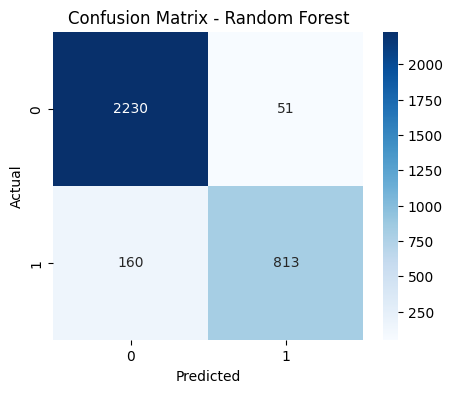

In [17]:
results = {}

print("\n--- Evaluation Results ---")
for name, model in models.items():
    # Train
    model.fit(X_train_tfidf, y_train)

    # Predict
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary')
    rec = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    results[name] = {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

    print(f"\nModel: {name}")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## 3.5 Accuracy Comparison

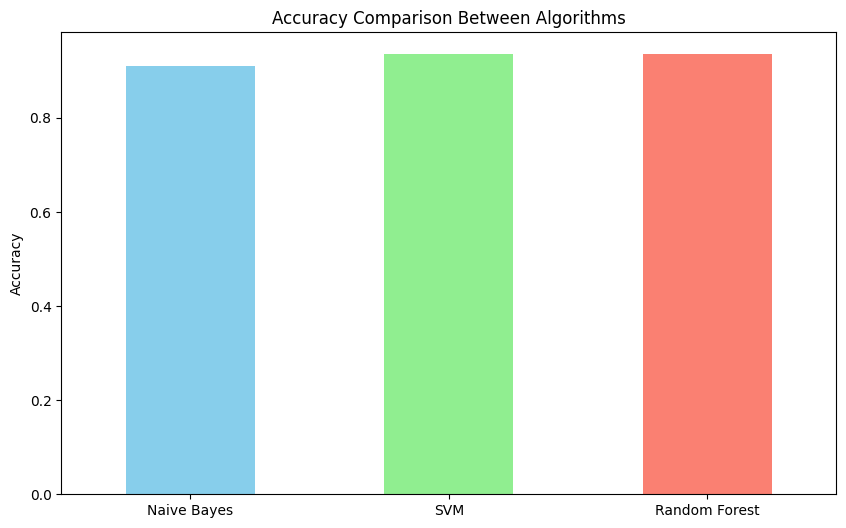

In [18]:
df_res = pd.DataFrame(results).T
plt.figure(figsize=(10, 6))
df_res['Accuracy'].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Accuracy Comparison Between Algorithms')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()